# **Investigating deaths due to Covid and countries with the highest vaccination rates**


---

Here I investigate total death percentage in the UK due to Covid and compare it to other countries. I also rank countries that have administered the highest number of vaccine doses per 100 residents. This notebook mainly serves to demonstrate some of the SQL commands for querying tables. 

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data_df = pd.read_csv(url)

data_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.633540e+05,2.906040e+05,2.893400e+05,2.432290e+05,290686.000000,289456.000000,263354.000000,290604.000000,289340.000000,243229.000000,...,171608.000000,113531.000000,204719.000000,275214.000000,224794.000000,2.993170e+05,1.029500e+04,10295.000000,10295.000000,10295.000000
mean,5.423132e+06,1.110653e+04,1.115202e+04,7.821417e+04,98.990467,99.381680,82882.753718,167.451019,168.125742,785.938076,...,32.913356,50.798359,3.098147,73.721734,0.722569,1.284176e+08,4.727286e+04,9.535368,12.996518,1453.830857
std,3.405955e+07,1.048646e+05,1.022032e+05,4.058042e+05,610.463653,600.953399,133002.421636,1147.575425,646.271440,1033.880973,...,13.571325,31.956082,2.549045,7.396651,0.148992,6.606598e+08,1.377826e+05,13.082029,26.634303,1830.272458
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-1984.281600
25%,6.091000e+03,0.000000e+00,1.286000e+00,1.160000e+02,0.000000,0.000000,1828.126000,0.000000,0.316000,47.143000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,2.185000e+01,0.420000,-1.040000,15.453504
50%,5.866550e+04,2.000000e+01,4.114300e+01,1.163000e+03,0.000000,0.286000,18604.522500,2.938000,11.709500,315.636000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,4.464499e+03,7.750000,6.750000,881.367860
75%,6.070298e+05,5.640000e+02,6.635710e+02,1.019200e+04,6.000000,7.000000,99190.921250,74.120000,110.136750,1192.778000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.174990e+04,15.520000,18.545000,2372.123350
max,7.614015e+08,7.946354e+06,6.402146e+06,6.886987e+06,20005.000000,14581.286000,730701.881000,228872.025000,37241.781000,6453.558000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.282260e+06,76.550000,377.040000,10329.523000


In [241]:
#Use separate dataframes to simulate the join command in sql
covid_deaths_df=data_df[['location', 'date', 'continent','total_cases', 'new_cases', 'total_deaths', 'population']]
vaccinations_df=data_df[['location', 'date', 'continent', 'new_vaccinations','population']]

In [242]:
vaccinations_df

,location,date,continent,new_vaccinations,population
0,Afghanistan,2020-01-03,Asia,NaN,41128772.0
1,Afghanistan,2020-01-04,Asia,NaN,41128772.0
2,Afghanistan,2020-01-05,Asia,NaN,41128772.0
3,Afghanistan,2020-01-06,Asia,NaN,41128772.0
4,Afghanistan,2020-01-07,Asia,NaN,41128772.0
...,...,...,...,...,...
299312,Zimbabwe,2023-03-25,Africa,NaN,16320539.0
299313,Zimbabwe,2023-03-26,Africa,NaN,16320539.0
299314,Zimbabwe,2023-03-27,Africa,NaN,16320539.0
299315,Zimbabwe,2023-03-28,Africa,NaN,16320539.0


In [243]:
def sqltab(query):
    query_df = pd.DataFrame(query)

    # Set the column names of the DataFrame
    query_df.columns = [description[0] for description in query.description]
    return query_df

In [244]:
# Connect to a SQLite database file
conn = sqlite3.connect('covid_project.db')

# Write the data to a SQLite table
covid_deaths_df.to_sql('deaths_table', conn, if_exists='replace', index=False)
vaccinations_df.to_sql('vaccinations_table', conn, if_exists='replace', index=False)

# Create a cursor object
c = conn.cursor()

In [245]:
#Lets test our sqltab() function
covid_deaths = c.execute('''
SELECT 
 *
FROM
 deaths_table
''')

display(sqltab(covid_deaths))

,location,date,continent,total_cases,new_cases,total_deaths,population
0,Afghanistan,2020-01-03,Asia,NaN,0.0,NaN,41128772.0
1,Afghanistan,2020-01-04,Asia,NaN,0.0,NaN,41128772.0
2,Afghanistan,2020-01-05,Asia,NaN,0.0,NaN,41128772.0
3,Afghanistan,2020-01-06,Asia,NaN,0.0,NaN,41128772.0
4,Afghanistan,2020-01-07,Asia,NaN,0.0,NaN,41128772.0
...,...,...,...,...,...,...,...
299312,Zimbabwe,2023-03-25,Africa,264508.0,4.0,5679.0,16320539.0
299313,Zimbabwe,2023-03-26,Africa,264509.0,1.0,5679.0,16320539.0
299314,Zimbabwe,2023-03-27,Africa,264511.0,2.0,5679.0,16320539.0
299315,Zimbabwe,2023-03-28,Africa,264511.0,0.0,5679.0,16320539.0


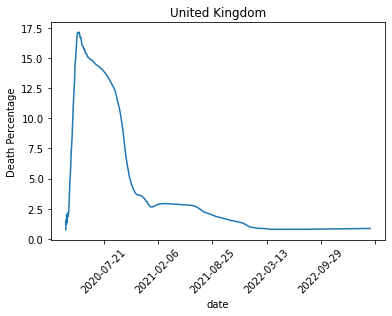

In [246]:
#Tracking the total death percentage in the UK from the start of the pandemic 
query1 = c.execute('''

SELECT Location, date, total_cases,total_deaths, (total_deaths/total_cases)*100 as DeathPercentage
FROM deaths_table
WHERE location LIKE '%kingdom%'
AND continent is not null''')

query1_df=sqltab(query1).set_index('date')
ax=query1_df['DeathPercentage'].plot(kind='line',title='United Kingdom')
tick_labels = ax.get_xticklabels()
ax.set_xticklabels(tick_labels, rotation=45)
ax.set_ylabel("Death Percentage")
plt.show()

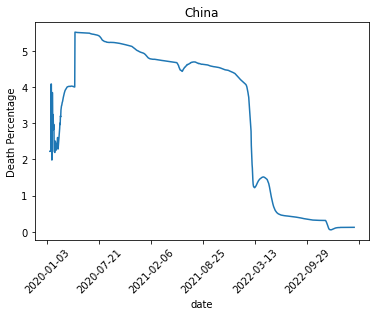

In [247]:
#Same query as above for China
query2 = c.execute('''
SELECT Location, date, total_cases,total_deaths, (total_deaths/total_cases)*100 as DeathPercentage
FROM deaths_table
WHERE location LIKE '%china%'
AND continent is not null''')

query2_df = sqltab(query2).set_index('date')
ax = query2_df['DeathPercentage'].plot(kind='line',title='China')
tick_labels = ax.get_xticklabels()
ax.set_xticklabels(tick_labels, rotation=45)
ax.set_ylabel("Death Percentage")
plt.show()


In [248]:
#Calculating the total population vaccinated in each country
query3 = c.execute('''
    WITH PopvsVac (Continent, Location, Date, Population, New_Vaccinations, RollingPeopleVaccinated) AS (
        SELECT dea.continent, dea.location, dea.date, dea.population, vac.new_vaccinations,
            SUM(CAST(vac.new_vaccinations AS INTEGER)) OVER (PARTITION BY dea.Location ORDER BY dea.location, dea.Date) AS RollingPeopleVaccinated
        FROM deaths_table dea
        JOIN vaccinations_table vac
        ON dea.location = vac.location AND dea.date = vac.date
        WHERE dea.continent IS NOT NULL 
    )
    SELECT *, (RollingPeopleVaccinated / Population) * 100
    FROM PopvsVac
''')

display(display_sqltab(query3))



,Continent,Location,Date,Population,New_Vaccinations,RollingPeopleVaccinated,(RollingPeopleVaccinated / Population) * 100
0,Asia,Afghanistan,2020-01-03,41128772.0,NaN,NaN,NaN
1,Asia,Afghanistan,2020-01-04,41128772.0,NaN,NaN,NaN
2,Asia,Afghanistan,2020-01-05,41128772.0,NaN,NaN,NaN
3,Asia,Afghanistan,2020-01-06,41128772.0,NaN,NaN,NaN
4,Asia,Afghanistan,2020-01-07,41128772.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
285061,Africa,Zimbabwe,2023-03-25,16320539.0,NaN,10801392.0,66.182814
285062,Africa,Zimbabwe,2023-03-26,16320539.0,NaN,10801392.0,66.182814
285063,Africa,Zimbabwe,2023-03-27,16320539.0,NaN,10801392.0,66.182814
285064,Africa,Zimbabwe,2023-03-28,16320539.0,NaN,10801392.0,66.182814


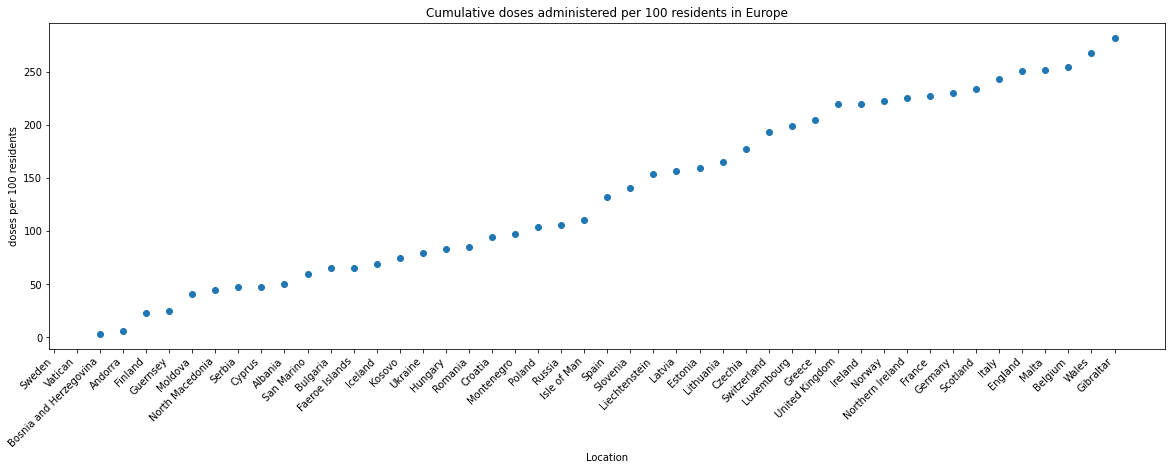

In [261]:
#Lets investigate the top countries that have administered the highest number of vaccine doses.
query4 = c.execute('''SELECT
dea.location,
dea.date,
dea.population,
(sum(CAST(vacc.new_vaccinations AS INTEGER)))/(vacc.population)*100 AS [doses per 100 residents]
        FROM deaths_table dea
        JOIN vaccinations_table vacc
        ON dea.location = vacc.location AND dea.date = vacc.date
        WHERE dea.continent IS NOT NULL AND dea.continent like '%europe%'


GROUP BY
dea.location
ORDER BY [doses per 100 residents]

''')

query4_df = sqltab(query4)
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(query4_df['location'], query4_df['doses per 100 residents'])
ax.set_xlabel('Location')
ax.set_ylabel('doses per 100 residents')
ax.set_title('Cumulative doses administered per 100 residents in Europe')
ax.tick_params(axis='x', labelrotation=45)
plt.xticks(ha='right')
plt.show()



We observe that Gibraltar, Wales, Belgium, Malta and England have the highest number of vaccine doses administered per 100 residents of the population. Results match reports found here: https://ig.ft.com/coronavirus-vaccine-tracker/?areas=gbr&areas=isr&areas=usa&areas=eue&areas=are&areas=chn&areas=chl&cumulative=1&doses=total&populationAdjusted=1

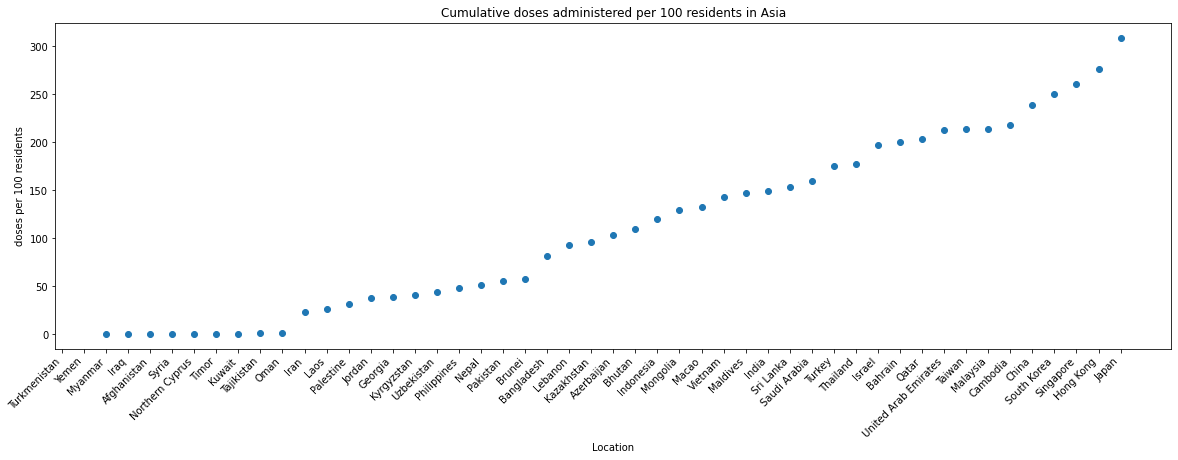

In [262]:
#Let's check the above query for Asia
query5 = c.execute('''SELECT
dea.location,
dea.date,
dea.population,
(sum(CAST(vacc.new_vaccinations AS INTEGER)))/(vacc.population)*100 AS [doses per 100 residents]
        FROM deaths_table dea
        JOIN vaccinations_table vacc
        ON dea.location = vacc.location AND dea.date = vacc.date
        WHERE dea.continent IS NOT NULL AND dea.continent like '%asia%'


GROUP BY
dea.location
ORDER BY [doses per 100 residents]

''')

query5_df = sqltab(query5)
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(query5_df['location'], query5_df['doses per 100 residents'])
ax.set_xlabel('Location')
ax.set_ylabel('doses per 100 residents')
ax.set_title('Cumulative doses administered per 100 residents in Asia')
ax.tick_params(axis='x', labelrotation=45)
plt.xticks(ha='right')
plt.show()

In [227]:
# Close the database connection
conn.close()